<a href="https://www.kaggle.com/code/rajatraj0502/global-youtube-statistics-2023?scriptVersionId=138205735" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv


In [2]:
# Load the data into a pandas DataFrame using 'ISO-8859-1' encoding
youtube_data = pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv', encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
youtube_data.head()


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
# Basic statistics
num_unique_youtubers = youtube_data['Youtuber'].nunique()
avg_subscribers = youtube_data['subscribers'].mean()
avg_video_views = youtube_data['video views'].mean()

# Most common categories
common_categories = youtube_data['category'].value_counts()

# Distribution of channels by country
channel_country_distribution = youtube_data['Country'].value_counts()

# Check for missing values
missing_values = youtube_data.isnull().sum()

num_unique_youtubers, avg_subscribers, avg_video_views, common_categories, channel_country_distribution, missing_values


(995,
 22982412.06030151,
 11039537052.03819,
 Entertainment            241
 Music                    202
 People & Blogs           132
 Gaming                    94
 Comedy                    69
 Film & Animation          46
 Education                 45
 Howto & Style             40
 News & Politics           26
 Science & Technology      17
 Shows                     13
 Sports                    11
 Pets & Animals             4
 Trailers                   2
 Nonprofits & Activism      2
 Movies                     2
 Autos & Vehicles           2
 Travel & Events            1
 Name: category, dtype: int64,
 United States           313
 India                   168
 Brazil                   62
 United Kingdom           43
 Mexico                   33
 Indonesia                28
 Spain                    22
 Thailand                 18
 South Korea              17
 Russia                   16
 Canada                   15
 Argentina                13
 Philippines              12
 Colom

In [4]:
# Select numerical columns for correlation analysis
numerical_cols = ['subscribers', 'video views', 'uploads', 
                  'lowest_monthly_earnings', 'highest_monthly_earnings', 
                  'lowest_yearly_earnings', 'highest_yearly_earnings',
                  'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']

# Calculate correlation matrix
correlation_matrix = youtube_data[numerical_cols].corr()

correlation_matrix


,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,video_views_for_the_last_30_days,subscribers_for_last_30_days
subscribers,1.000000,0.750958,0.077136,0.388941,0.388579,0.389072,0.388935,0.278846,0.309527
video views,0.750958,1.000000,0.165928,0.552096,0.551455,0.552776,0.552091,0.361856,0.187384
uploads,0.077136,0.165928,1.000000,0.166922,0.167283,0.167745,0.166904,0.101521,0.008933
lowest_monthly_earnings,0.388941,0.552096,0.166922,1.000000,0.999955,0.999942,0.999998,0.680330,0.679360
highest_monthly_earnings,0.388579,0.551455,0.167283,0.999955,1.000000,0.999884,0.999953,0.680289,0.679699
lowest_yearly_earnings,0.389072,0.552776,0.167745,0.999942,0.999884,1.000000,0.999941,0.680278,0.678394
highest_yearly_earnings,0.388935,0.552091,0.166904,0.999998,0.999953,0.999941,1.000000,0.680330,0.679380
video_views_for_the_last_30_days,0.278846,0.361856,0.101521,0.680330,0.680289,0.680278,0.680330,1.000000,0.451523
subscribers_for_last_30_days,0.309527,0.187384,0.008933,0.679360,0.679699,0.678394,0.679380,0.451523,1.000000


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


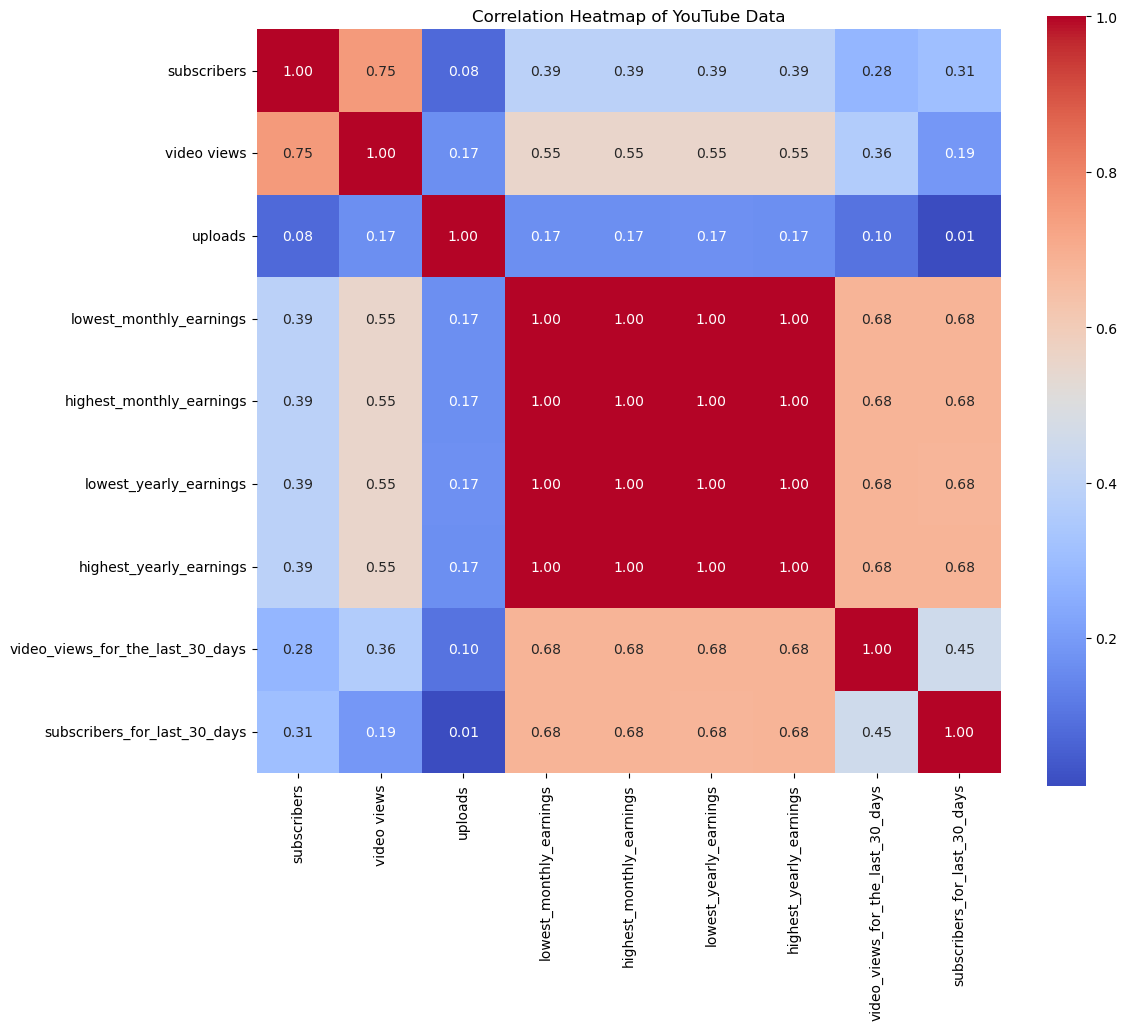

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Title
plt.title('Correlation Heatmap of YouTube Data')

plt.show()


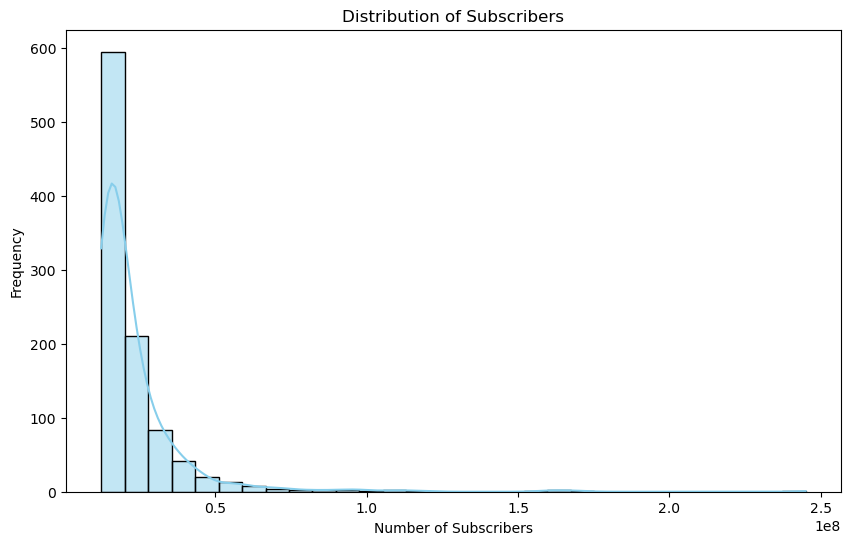

In [6]:
# Plot size
plt.figure(figsize=(10, 6))

# Create a histogram for subscribers
sns.histplot(youtube_data['subscribers'], bins=30, color='skyblue', kde=True)

# Title and labels
plt.title('Distribution of Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Frequency')

plt.show()


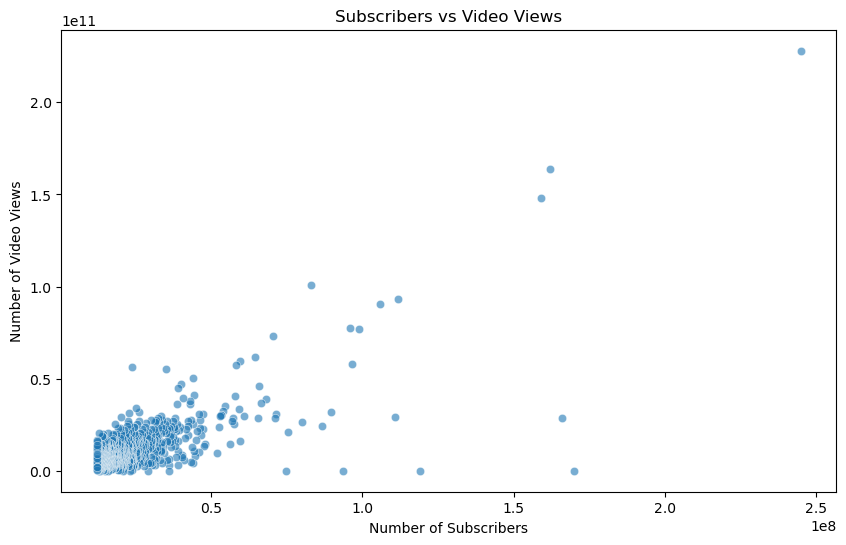

In [7]:
# Plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot for subscribers vs video views
sns.scatterplot(data=youtube_data, x='subscribers', y='video views', alpha=0.6)

# Title and labels
plt.title('Subscribers vs Video Views')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Video Views')

plt.show()


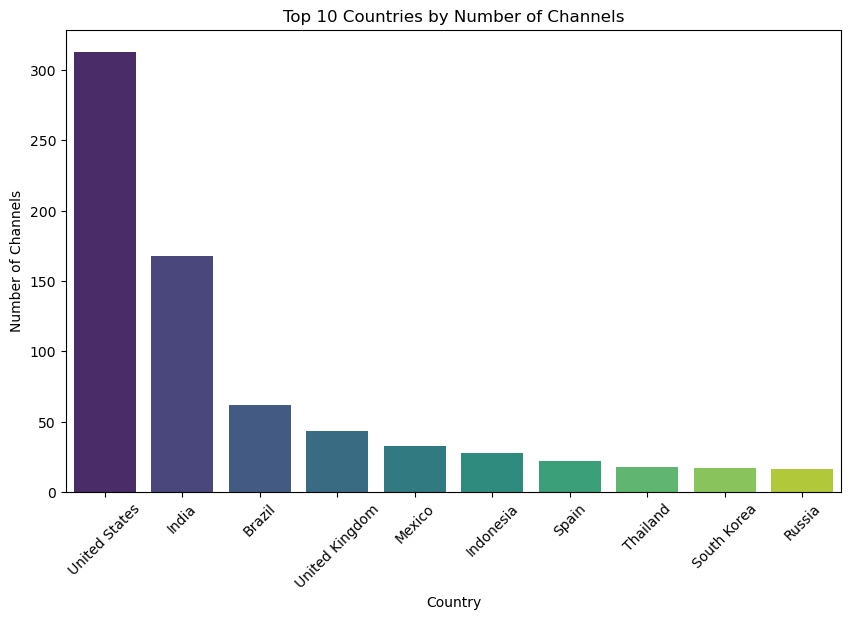

In [8]:
# Select the top 10 countries with the most channels for visualization
top_countries = channel_country_distribution[:10]

# Plot size
plt.figure(figsize=(10, 6))

# Create a bar plot for the number of channels in each country
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')

# Title and labels
plt.title('Top 10 Countries by Number of Channels')
plt.xlabel('Country')
plt.ylabel('Number of Channels')

# Rotate the country names for better readability
plt.xticks(rotation=45)

plt.show()


In [9]:
# Group by category and calculate average subscribers, video views, and earnings
category_analysis = youtube_data.groupby('category').agg({
    'subscribers': 'mean',
    'video views': 'mean',
    'highest_yearly_earnings': 'mean'
}).sort_values('subscribers', ascending=False)

# Display the result
category_analysis


,subscribers,video views,highest_yearly_earnings
category,,,
Shows,4.161538e+07,3.432360e+10,2.438462e+07
Trailers,3.900000e+07,1.663136e+10,4.350000e+06
Film & Animation,2.858478e+07,1.183527e+10,8.797580e+06
Nonprofits & Activism,2.775000e+07,5.431456e+09,4.700000e+06
Sports,2.710909e+07,1.345330e+10,9.615118e+06
Education,2.654222e+07,1.548032e+10,8.324391e+06
Music,2.571782e+07,1.545286e+10,6.643245e+06
Movies,2.565000e+07,7.691628e+09,5.450000e+06
Entertainment,2.140332e+07,1.048854e+10,7.483962e+06


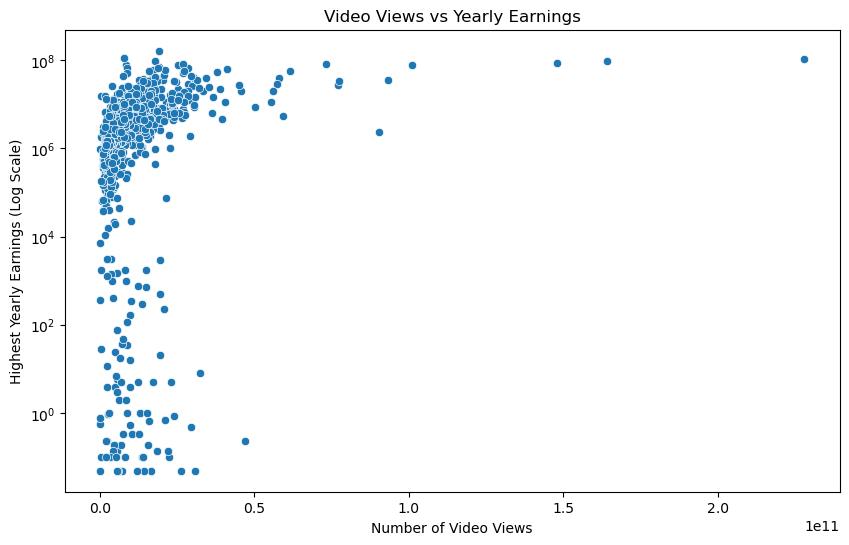

In [10]:
# Remove entries with missing or zero earnings to avoid issues with log scale
earnings_analysis_data = youtube_data[(youtube_data['highest_yearly_earnings'].notna()) & 
                                      (youtube_data['highest_yearly_earnings'] > 0)]

# Plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot for video views vs earnings (in log scale)
sns.scatterplot(data=earnings_analysis_data, x='video views', y='highest_yearly_earnings')

# Set the y-axis to log scale
plt.yscale('log')

# Title and labels
plt.title('Video Views vs Yearly Earnings')
plt.xlabel('Number of Video Views')
plt.ylabel('Highest Yearly Earnings (Log Scale)')

plt.show()


In [11]:
# Group by creation year and calculate average subscribers, video views, and earnings
time_analysis = youtube_data.groupby('created_year').agg({
    'subscribers': 'mean',
    'video views': 'mean',
    'highest_yearly_earnings': 'mean'
})

# Display the result
time_analysis


,subscribers,video views,highest_yearly_earnings
created_year,,,
1970.0,3.630000e+07,3.010785e+09,1.000000e+06
2005.0,2.582917e+07,1.509300e+10,7.001296e+06
2006.0,3.188462e+07,1.705780e+10,7.945075e+06
2007.0,2.490204e+07,1.465191e+10,7.743566e+06
2008.0,2.365217e+07,1.365319e+10,7.533093e+06
2009.0,2.310577e+07,1.225264e+10,5.955317e+06
2010.0,2.067083e+07,9.605543e+09,3.467663e+06
2011.0,2.180000e+07,1.038110e+10,5.188028e+06
2012.0,2.403824e+07,1.071023e+10,6.293155e+06


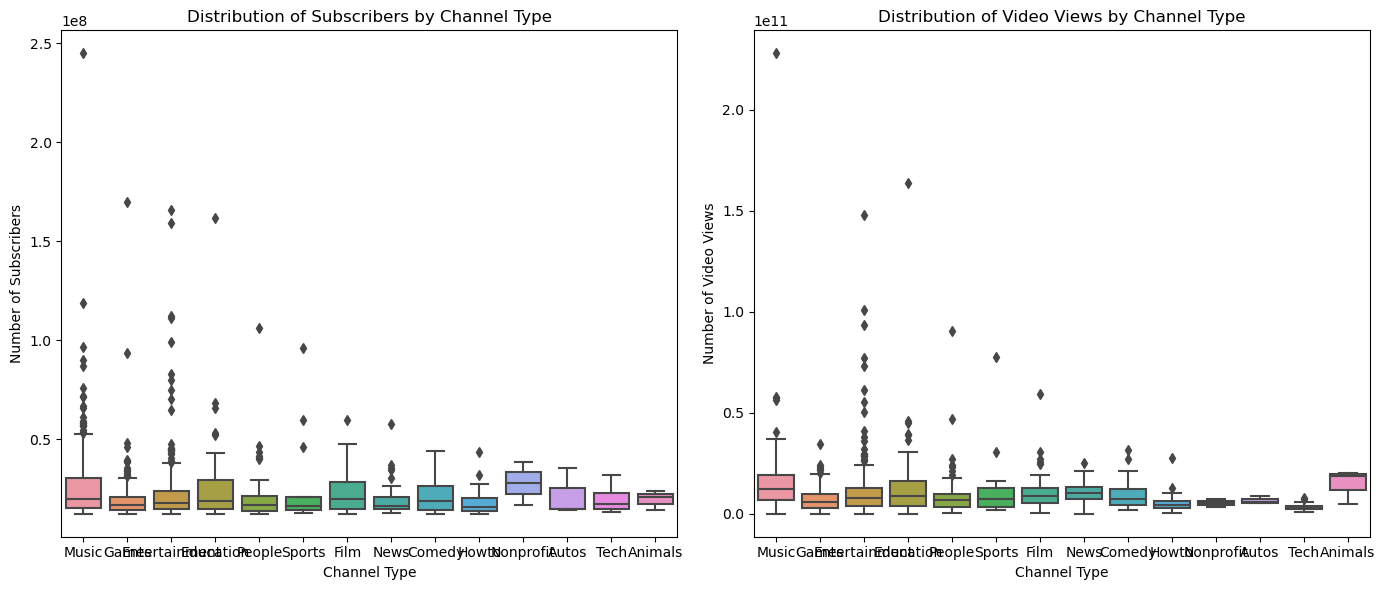

In [12]:
# Plot size
plt.figure(figsize=(14, 6))

# Create box plots for subscribers and views based on channel type
plt.subplot(1, 2, 1)
sns.boxplot(data=youtube_data, x='channel_type', y='subscribers')
plt.title('Distribution of Subscribers by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Number of Subscribers')

plt.subplot(1, 2, 2)
sns.boxplot(data=youtube_data, x='channel_type', y='video views')
plt.title('Distribution of Video Views by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Number of Video Views')

plt.tight_layout()
plt.show()


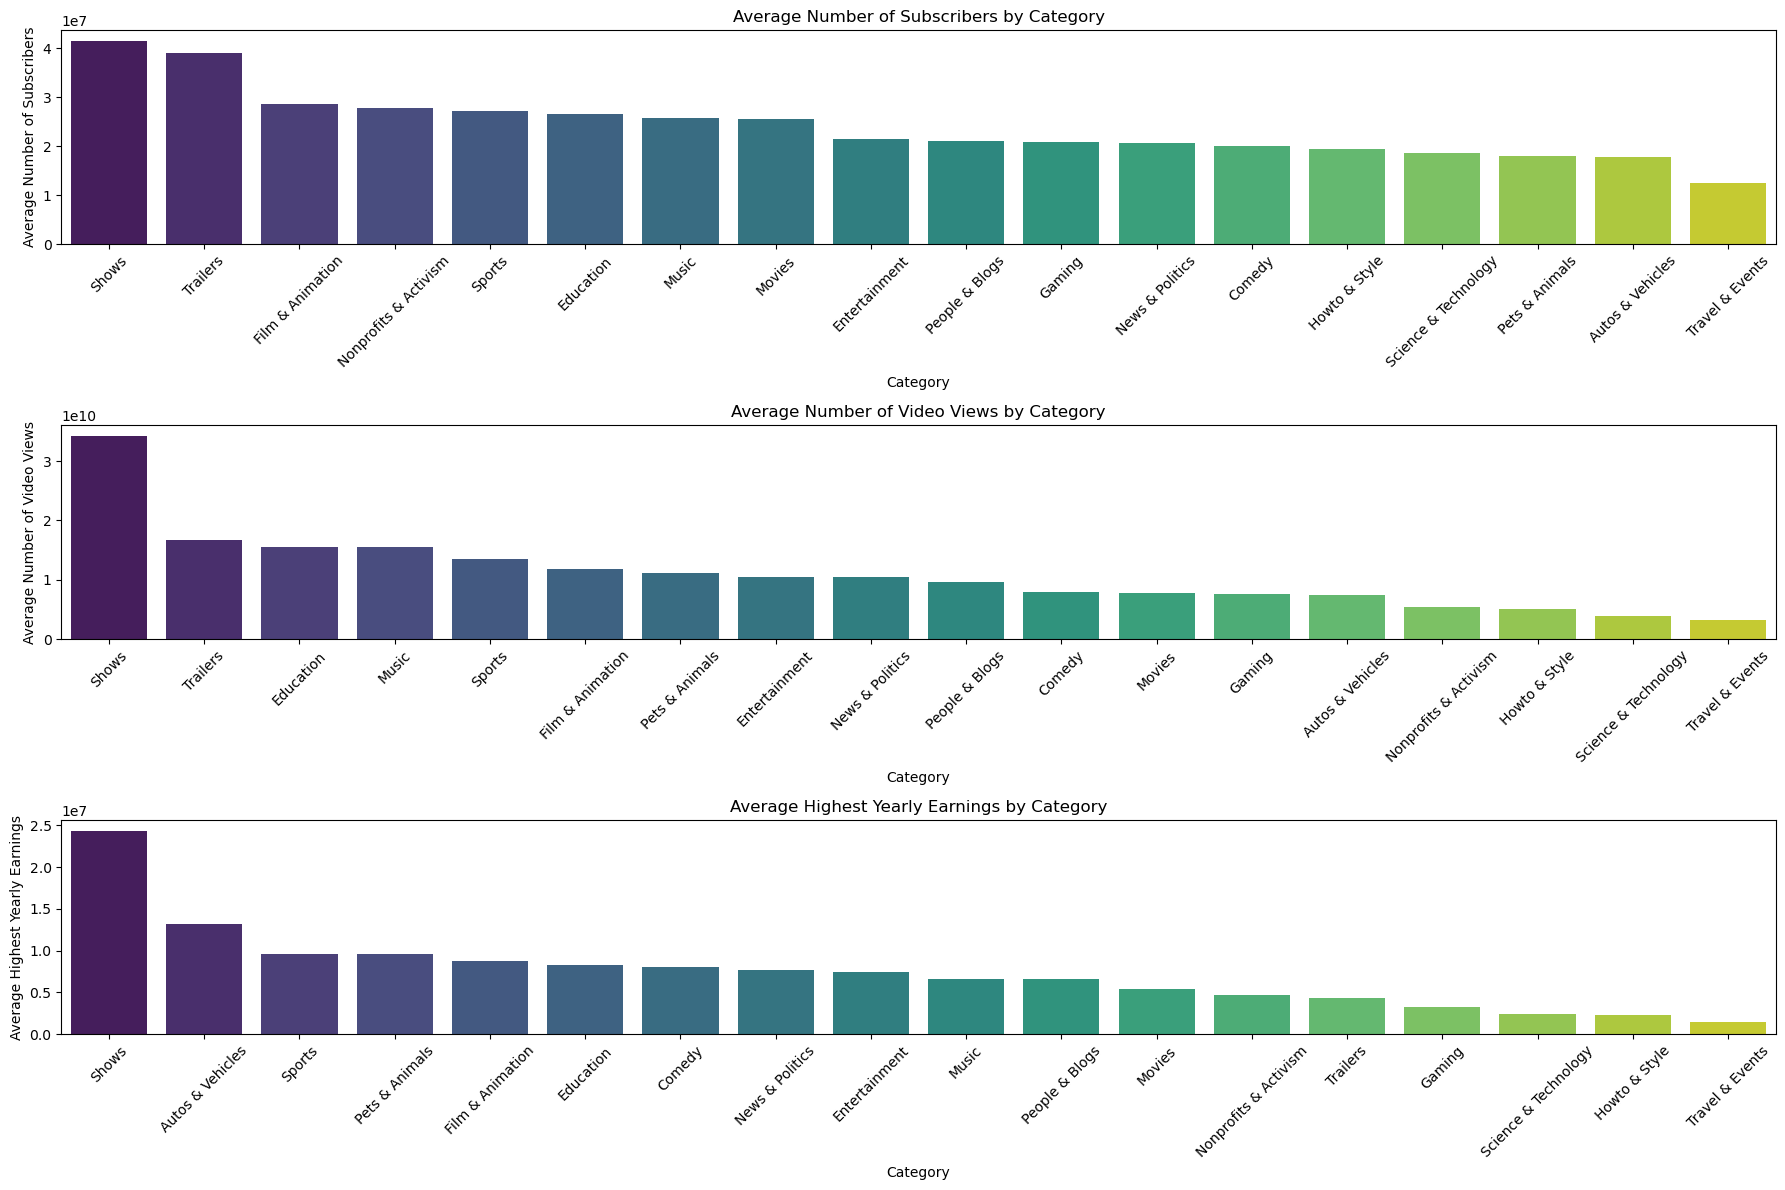

In [13]:
# Calculate average subscribers, views, and earnings for each category
category_avg_subscribers = youtube_data.groupby('category')['subscribers'].mean().sort_values(ascending=False)
category_avg_views = youtube_data.groupby('category')['video views'].mean().sort_values(ascending=False)
category_avg_earnings = youtube_data.groupby('category')['highest_yearly_earnings'].mean().sort_values(ascending=False)

# Plot size
plt.figure(figsize=(18, 12))

# Create a bar plot for average subscribers by category
plt.subplot(3, 1, 1)
sns.barplot(x=category_avg_subscribers.index, y=category_avg_subscribers.values, palette='viridis')
plt.title('Average Number of Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Average Number of Subscribers')
plt.xticks(rotation=45)

# Create a bar plot for average video views by category
plt.subplot(3, 1, 2)
sns.barplot(x=category_avg_views.index, y=category_avg_views.values, palette='viridis')
plt.title('Average Number of Video Views by Category')
plt.xlabel('Category')
plt.ylabel('Average Number of Video Views')
plt.xticks(rotation=45)

# Create a bar plot for average earnings by category
plt.subplot(3, 1, 3)
sns.barplot(x=category_avg_earnings.index, y=category_avg_earnings.values, palette='viridis')
plt.title('Average Highest Yearly Earnings by Category')
plt.xlabel('Category')
plt.ylabel('Average Highest Yearly Earnings')
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


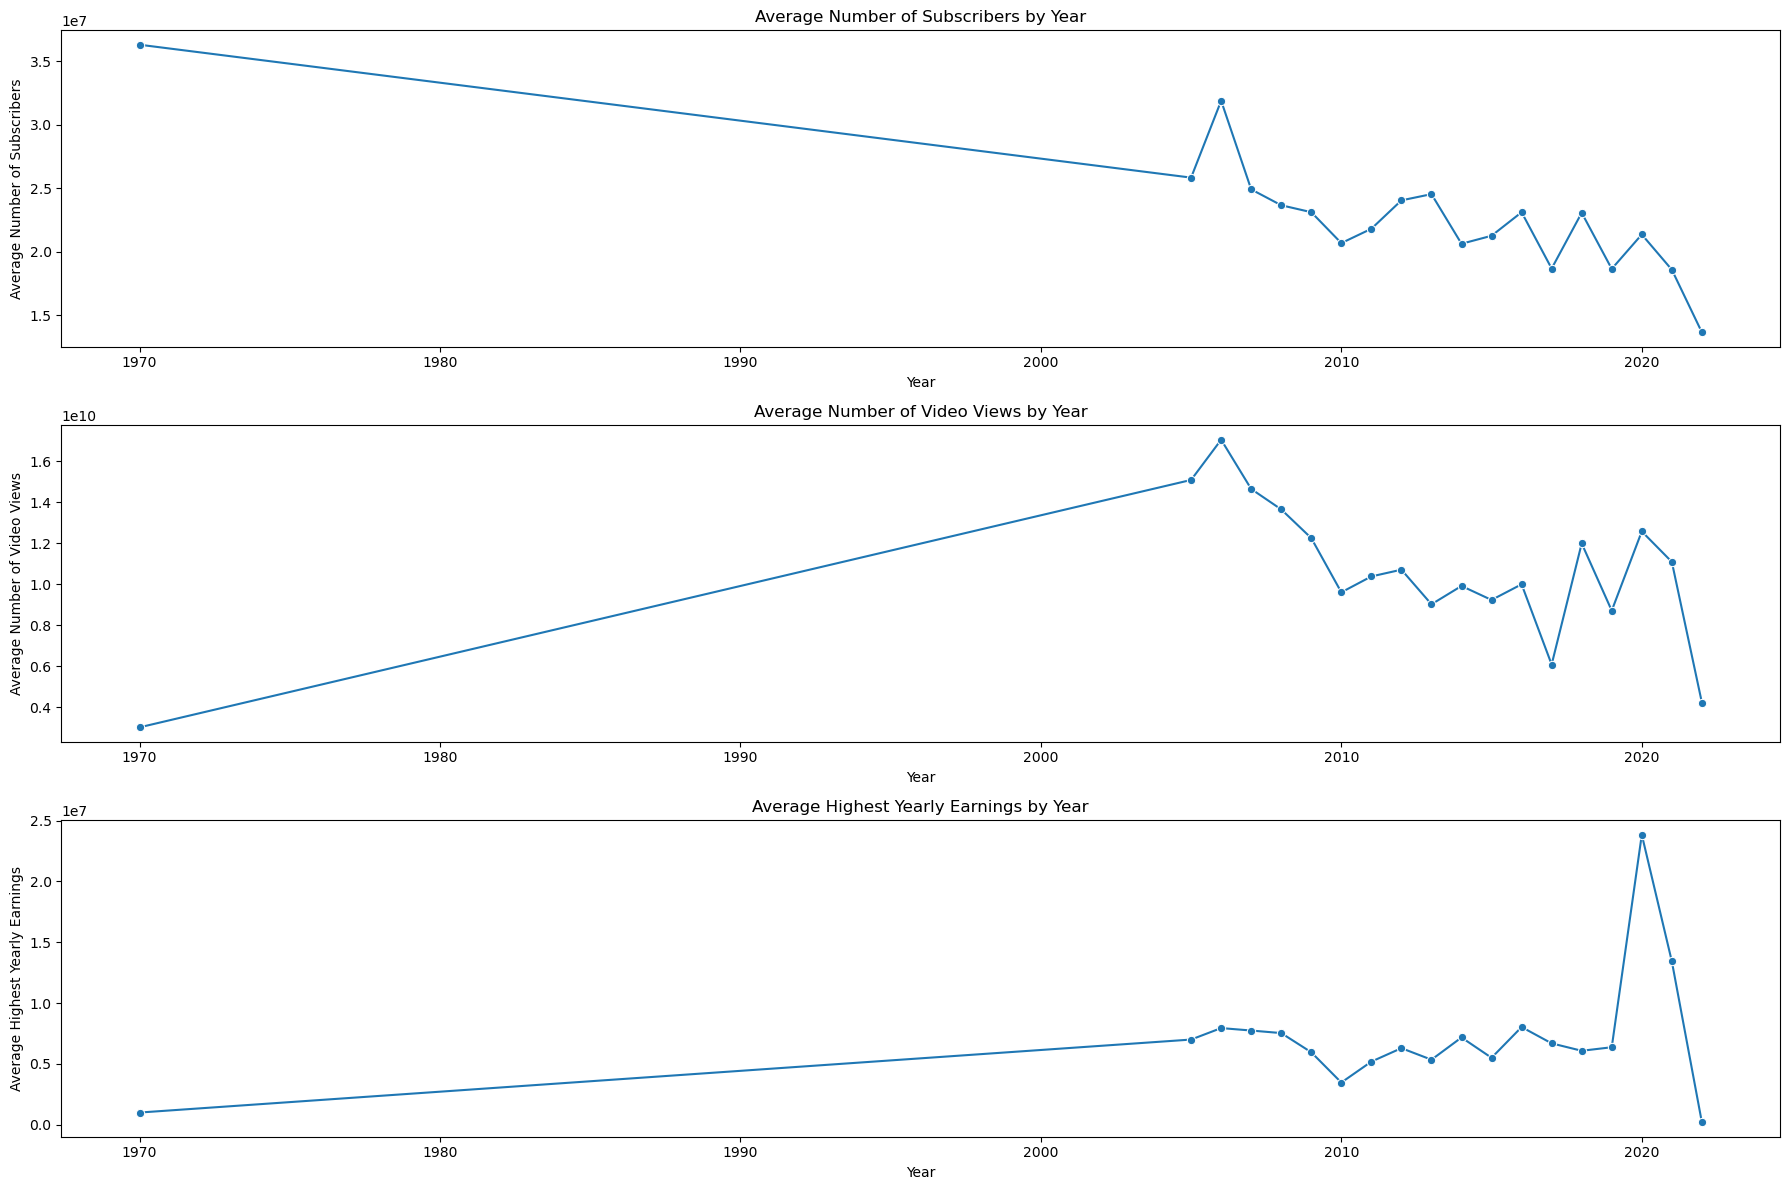

In [14]:
# Calculate average subscribers, views, and earnings for each year
year_avg_subscribers = youtube_data.groupby('created_year')['subscribers'].mean()
year_avg_views = youtube_data.groupby('created_year')['video views'].mean()
year_avg_earnings = youtube_data.groupby('created_year')['highest_yearly_earnings'].mean()

# Plot size
plt.figure(figsize=(18, 12))

# Create a line plot for average subscribers by year
plt.subplot(3, 1, 1)
sns.lineplot(x=year_avg_subscribers.index, y=year_avg_subscribers.values, marker='o')
plt.title('Average Number of Subscribers by Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Subscribers')

# Create a line plot for average video views by year
plt.subplot(3, 1, 2)
sns.lineplot(x=year_avg_views.index, y=year_avg_views.values, marker='o')
plt.title('Average Number of Video Views by Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Video Views')

# Create a line plot for average earnings by year
plt.subplot(3, 1, 3)
sns.lineplot(x=year_avg_earnings.index, y=year_avg_earnings.values, marker='o')
plt.title('Average Highest Yearly Earnings by Year')
plt.xlabel('Year')
plt.ylabel('Average Highest Yearly Earnings')

# Adjust the layout
plt.tight_layout()
plt.show()


In [15]:
# Calculate average subscribers, views, and earnings for each country
country_avg_subscribers = youtube_data.groupby('Country')['subscribers'].mean().sort_values(ascending=False)
country_avg_views = youtube_data.groupby('Country')['video views'].mean().sort_values(ascending=False)
country_avg_earnings = youtube_data.groupby('Country')['highest_yearly_earnings'].mean().sort_values(ascending=False)

# Display the top 10 countries with the highest average subscribers, views, and earnings
top_countries_avg_subscribers = country_avg_subscribers[:10]
top_countries_avg_views = country_avg_views[:10]
top_countries_avg_earnings = country_avg_earnings[:10]

top_countries_avg_subscribers, top_countries_avg_views, top_countries_avg_earnings


(Country
 Cuba           4.630000e+07
 El Salvador    4.610000e+07
 Barbados       4.190000e+07
 Japan          3.782000e+07
 Venezuela      3.120000e+07
 Kuwait         3.050000e+07
 Chile          2.906667e+07
 South Korea    2.833529e+07
 Pakistan       2.590000e+07
 India          2.565833e+07
 Name: subscribers, dtype: float64,
 Country
 Turkey       2.309981e+10
 Cuba         2.293663e+10
 Barbados     2.247775e+10
 Latvia       2.091940e+10
 Pakistan     1.888224e+10
 Jordan       1.769669e+10
 Japan        1.713640e+10
 Argentina    1.495503e+10
 Thailand     1.468433e+10
 Russia       1.456227e+10
 Name: video views, dtype: float64,
 Country
 Latvia                  5.980000e+07
 Italy                   3.010000e+07
 Pakistan                2.618341e+07
 Turkey                  2.402812e+07
 South Korea             1.883698e+07
 United Arab Emirates    1.733524e+07
 Japan                   1.684002e+07
 Argentina               1.158462e+07
 Germany                 1.126217e+07

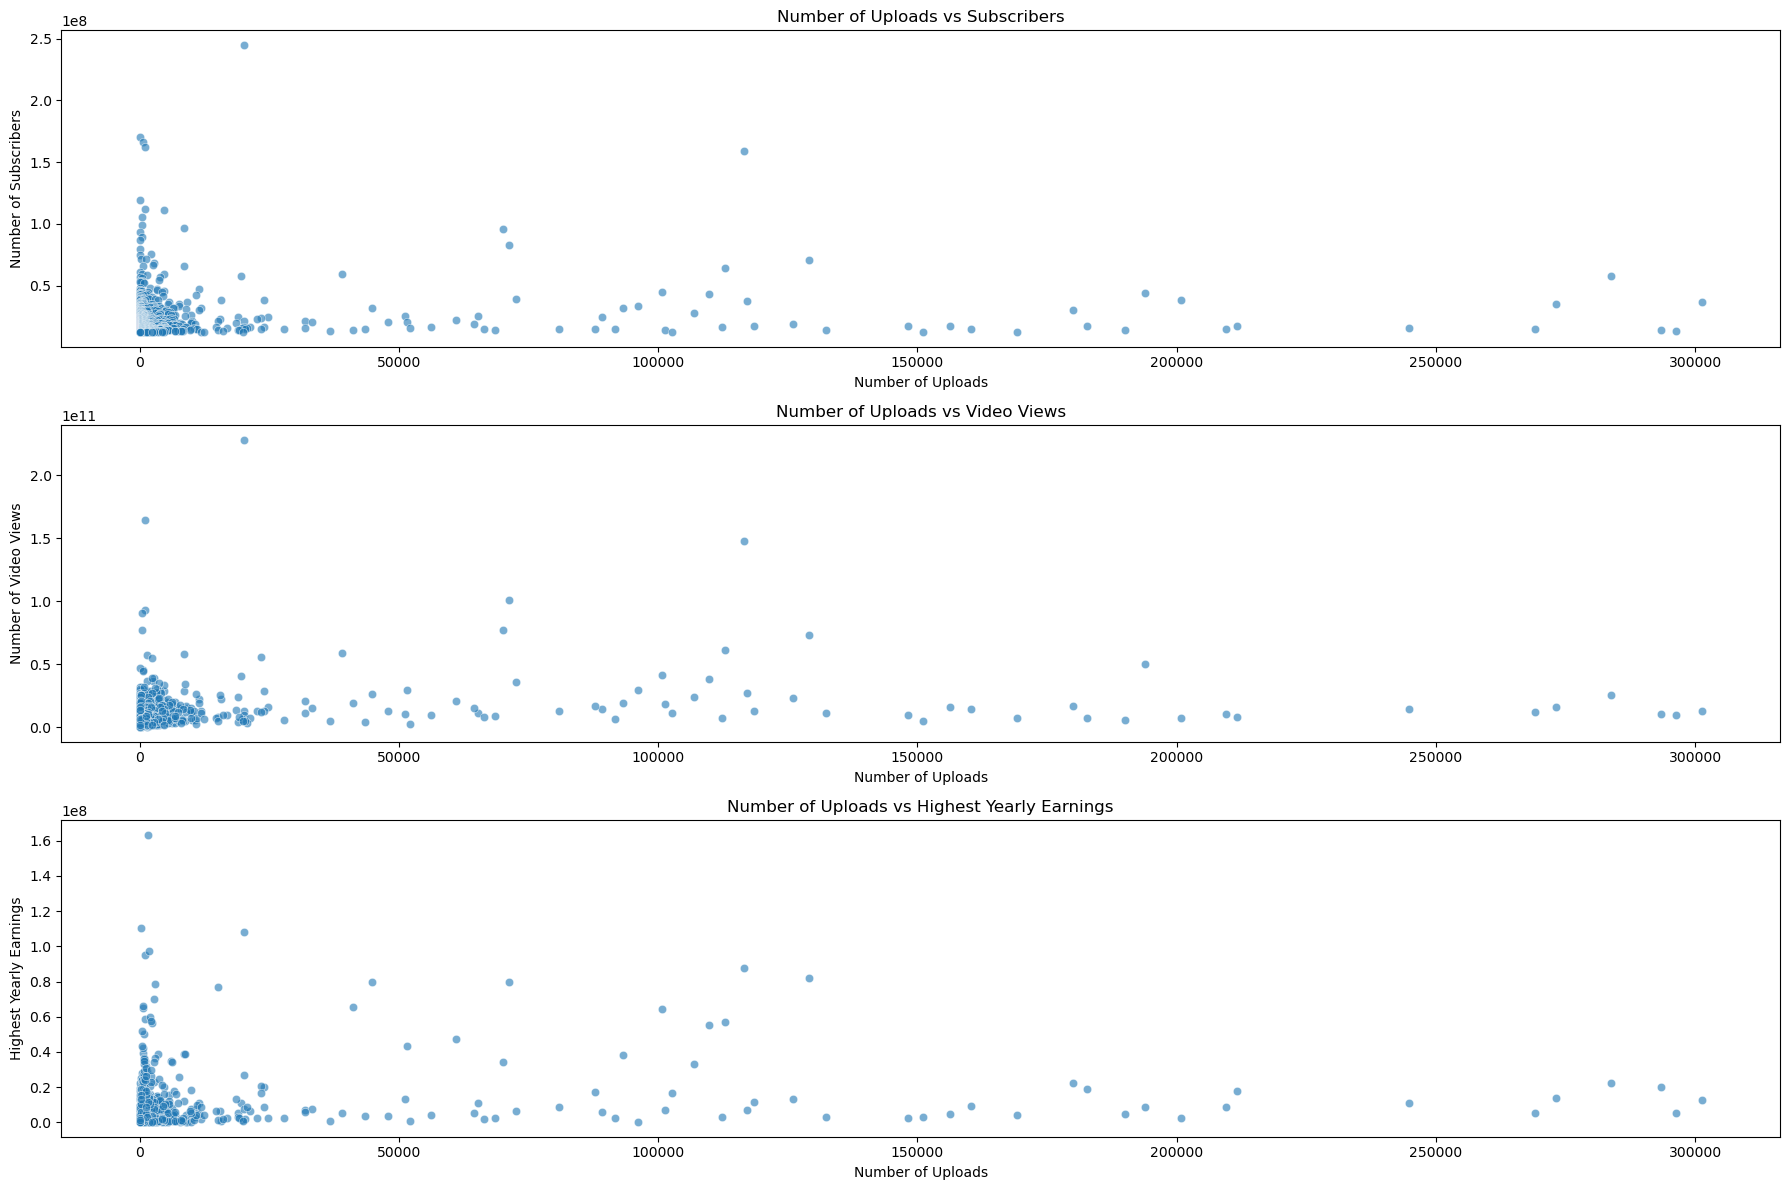

In [16]:
# Plot size
plt.figure(figsize=(18, 12))

# Create a scatter plot for uploads vs subscribers
plt.subplot(3, 1, 1)
sns.scatterplot(data=youtube_data, x='uploads', y='subscribers', alpha=0.6)
plt.title('Number of Uploads vs Subscribers')
plt.xlabel('Number of Uploads')
plt.ylabel('Number of Subscribers')

# Create a scatter plot for uploads vs video views
plt.subplot(3, 1, 2)
sns.scatterplot(data=youtube_data, x='uploads', y='video views', alpha=0.6)
plt.title('Number of Uploads vs Video Views')
plt.xlabel('Number of Uploads')
plt.ylabel('Number of Video Views')

# Create a scatter plot for uploads vs earnings
plt.subplot(3, 1, 3)
sns.scatterplot(data=youtube_data, x='uploads', y='highest_yearly_earnings', alpha=0.6)
plt.title('Number of Uploads vs Highest Yearly Earnings')
plt.xlabel('Number of Uploads')
plt.ylabel('Highest Yearly Earnings')

# Adjust the layout
plt.tight_layout()
plt.show()


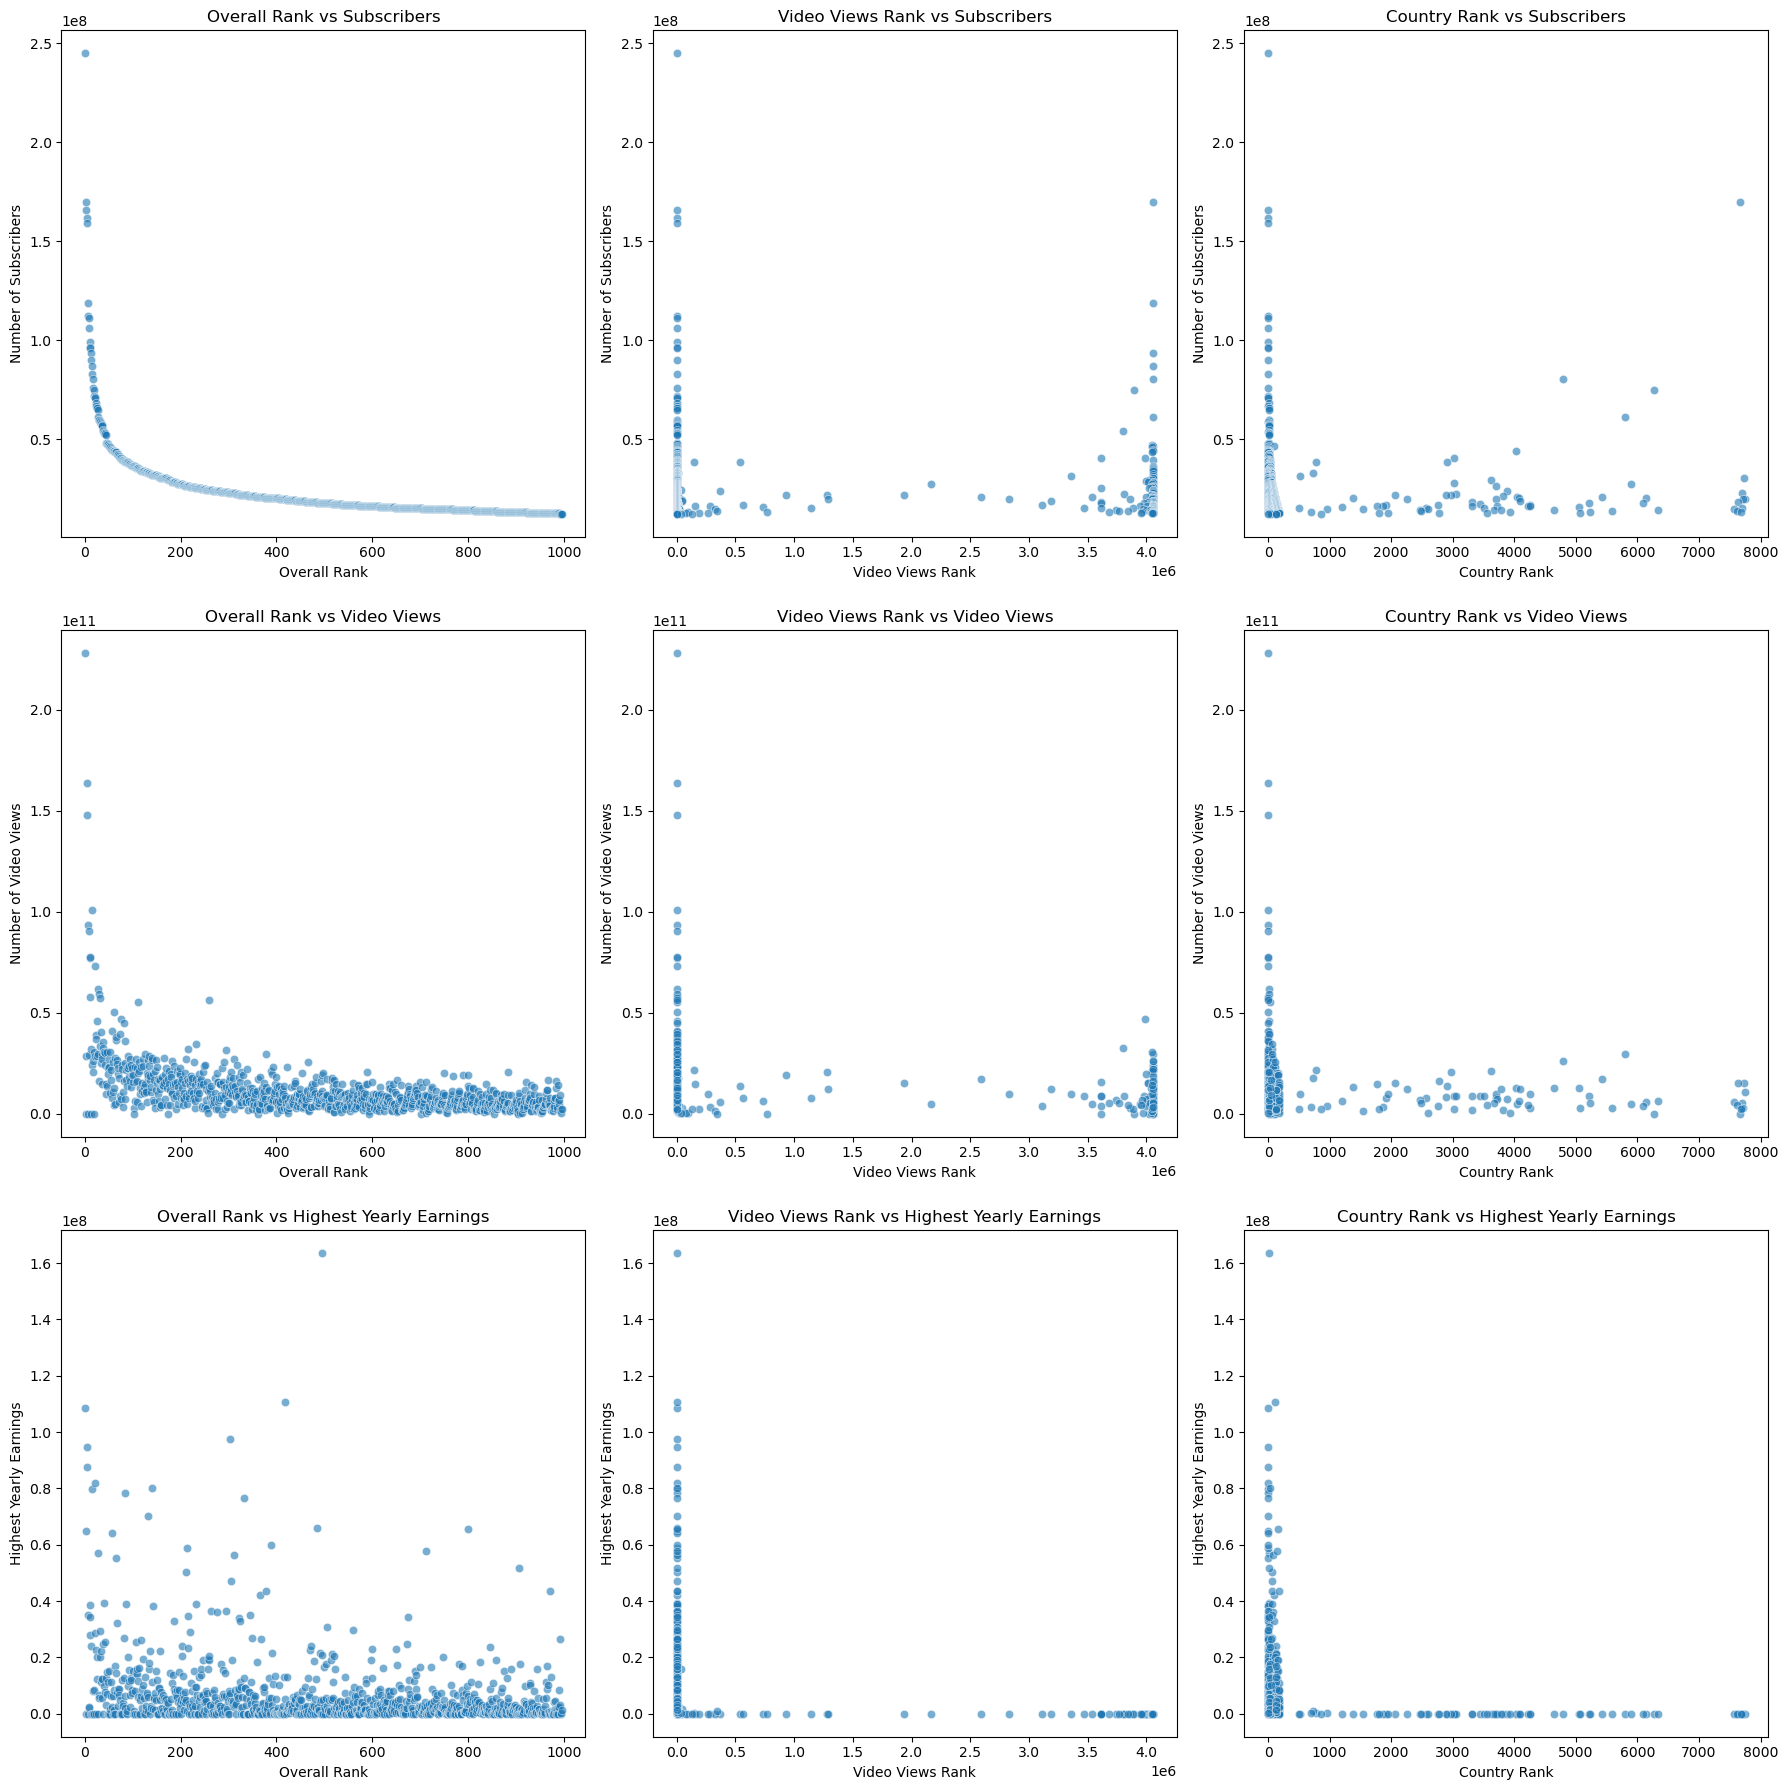

In [17]:
# Plot size
plt.figure(figsize=(18, 18))

# Create a scatter plot for rank vs subscribers
plt.subplot(3, 3, 1)
sns.scatterplot(data=youtube_data, x='rank', y='subscribers', alpha=0.6)
plt.title('Overall Rank vs Subscribers')
plt.xlabel('Overall Rank')
plt.ylabel('Number of Subscribers')

# Create a scatter plot for video_views_rank vs subscribers
plt.subplot(3, 3, 2)
sns.scatterplot(data=youtube_data, x='video_views_rank', y='subscribers', alpha=0.6)
plt.title('Video Views Rank vs Subscribers')
plt.xlabel('Video Views Rank')
plt.ylabel('Number of Subscribers')

# Create a scatter plot for country_rank vs subscribers
plt.subplot(3, 3, 3)
sns.scatterplot(data=youtube_data, x='country_rank', y='subscribers', alpha=0.6)
plt.title('Country Rank vs Subscribers')
plt.xlabel('Country Rank')
plt.ylabel('Number of Subscribers')

# Create a scatter plot for rank vs video views
plt.subplot(3, 3, 4)
sns.scatterplot(data=youtube_data, x='rank', y='video views', alpha=0.6)
plt.title('Overall Rank vs Video Views')
plt.xlabel('Overall Rank')
plt.ylabel('Number of Video Views')

# Create a scatter plot for video_views_rank vs video views
plt.subplot(3, 3, 5)
sns.scatterplot(data=youtube_data, x='video_views_rank', y='video views', alpha=0.6)
plt.title('Video Views Rank vs Video Views')
plt.xlabel('Video Views Rank')
plt.ylabel('Number of Video Views')

# Create a scatter plot for country_rank vs video views
plt.subplot(3, 3, 6)
sns.scatterplot(data=youtube_data, x='country_rank', y='video views', alpha=0.6)
plt.title('Country Rank vs Video Views')
plt.xlabel('Country Rank')
plt.ylabel('Number of Video Views')

# Create a scatter plot for rank vs earnings
plt.subplot(3, 3, 7)
sns.scatterplot(data=youtube_data, x='rank', y='highest_yearly_earnings', alpha=0.6)
plt.title('Overall Rank vs Highest Yearly Earnings')
plt.xlabel('Overall Rank')
plt.ylabel('Highest Yearly Earnings')

# Create a scatter plot for video_views_rank vs earnings
plt.subplot(3, 3, 8)
sns.scatterplot(data=youtube_data, x='video_views_rank', y='highest_yearly_earnings', alpha=0.6)
plt.title('Video Views Rank vs Highest Yearly Earnings')
plt.xlabel('Video Views Rank')
plt.ylabel('Highest Yearly Earnings')

# Create a scatter plot for country_rank vs earnings
plt.subplot(3, 3, 9)
sns.scatterplot(data=youtube_data, x='country_rank', y='highest_yearly_earnings', alpha=0.6)
plt.title('Country Rank vs Highest Yearly Earnings')
plt.xlabel('Country Rank')
plt.ylabel('Highest Yearly Earnings')

# Adjust the layout
plt.tight_layout()
plt.show()


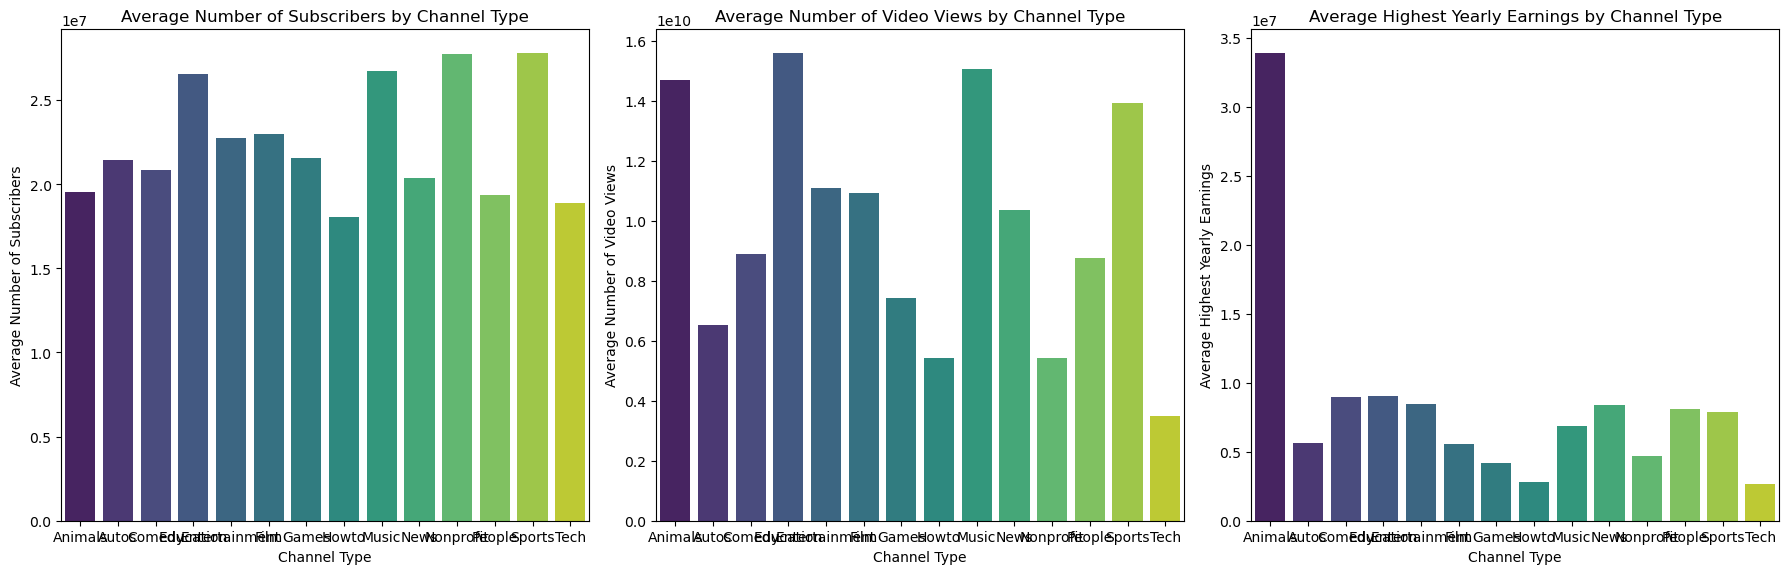

In [18]:
# Calculate average subscribers, views, and earnings for each channel type
type_avg_subscribers = youtube_data.groupby('channel_type')['subscribers'].mean()
type_avg_views = youtube_data.groupby('channel_type')['video views'].mean()
type_avg_earnings = youtube_data.groupby('channel_type')['highest_yearly_earnings'].mean()

# Plot size
plt.figure(figsize=(18, 6))

# Create a bar plot for average subscribers by channel type
plt.subplot(1, 3, 1)
sns.barplot(x=type_avg_subscribers.index, y=type_avg_subscribers.values, palette='viridis')
plt.title('Average Number of Subscribers by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Average Number of Subscribers')

# Create a bar plot for average video views by channel type
plt.subplot(1, 3, 2)
sns.barplot(x=type_avg_views.index, y=type_avg_views.values, palette='viridis')
plt.title('Average Number of Video Views by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Average Number of Video Views')

# Create a bar plot for average earnings by channel type
plt.subplot(1, 3, 3)
sns.barplot(x=type_avg_earnings.index, y=type_avg_earnings.values, palette='viridis')
plt.title('Average Highest Yearly Earnings by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Average Highest Yearly Earnings')

# Adjust the layout
plt.tight_layout()
plt.show()


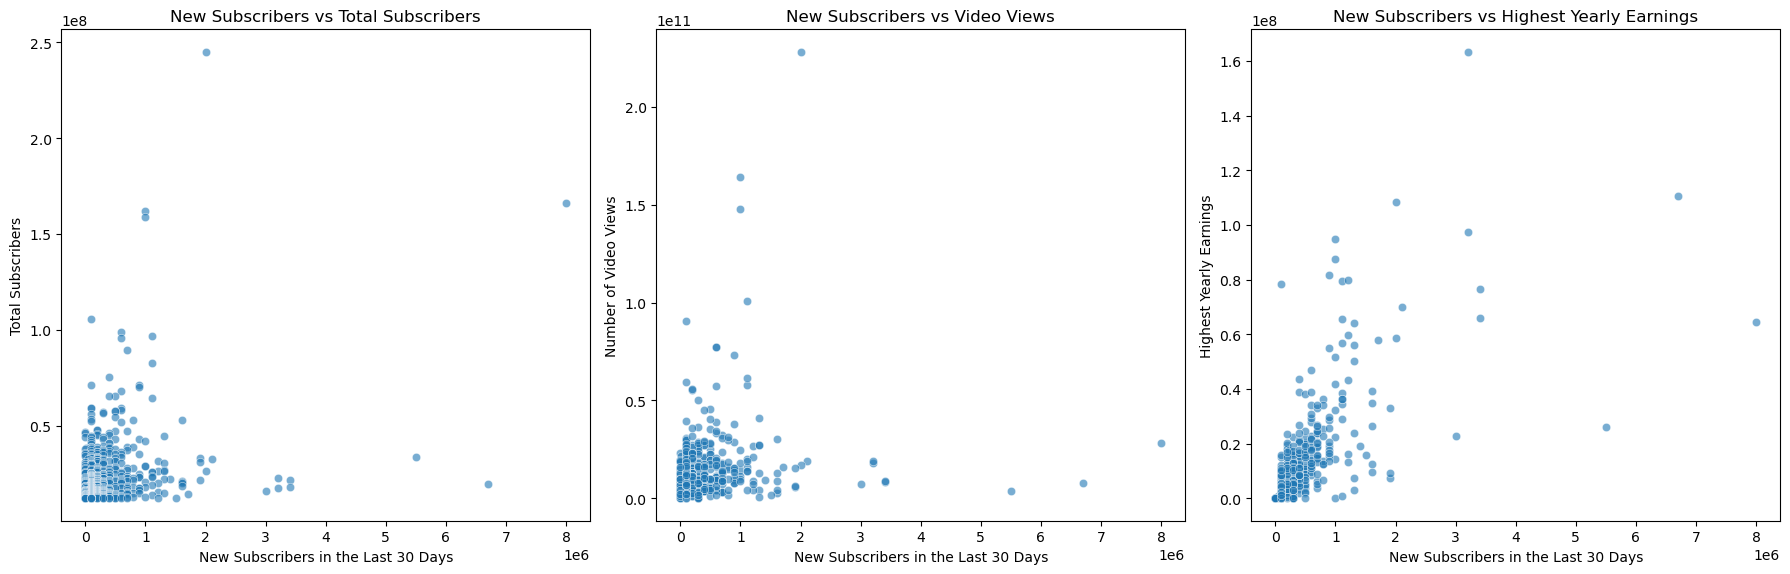

In [19]:
# Plot size
plt.figure(figsize=(18, 6))

# Create a scatter plot for subscribers_for_last_30_days vs subscribers
plt.subplot(1, 3, 1)
sns.scatterplot(data=youtube_data, x='subscribers_for_last_30_days', y='subscribers', alpha=0.6)
plt.title('New Subscribers vs Total Subscribers')
plt.xlabel('New Subscribers in the Last 30 Days')
plt.ylabel('Total Subscribers')

# Create a scatter plot for subscribers_for_last_30_days vs video views
plt.subplot(1, 3, 2)
sns.scatterplot(data=youtube_data, x='subscribers_for_last_30_days', y='video views', alpha=0.6)
plt.title('New Subscribers vs Video Views')
plt.xlabel('New Subscribers in the Last 30 Days')
plt.ylabel('Number of Video Views')

# Create a scatter plot for subscribers_for_last_30_days vs earnings
plt.subplot(1, 3, 3)
sns.scatterplot(data=youtube_data, x='subscribers_for_last_30_days', y='highest_yearly_earnings', alpha=0.6)
plt.title('New Subscribers vs Highest Yearly Earnings')
plt.xlabel('New Subscribers in the Last 30 Days')
plt.ylabel('Highest Yearly Earnings')

# Adjust the layout
plt.tight_layout()
plt.show()


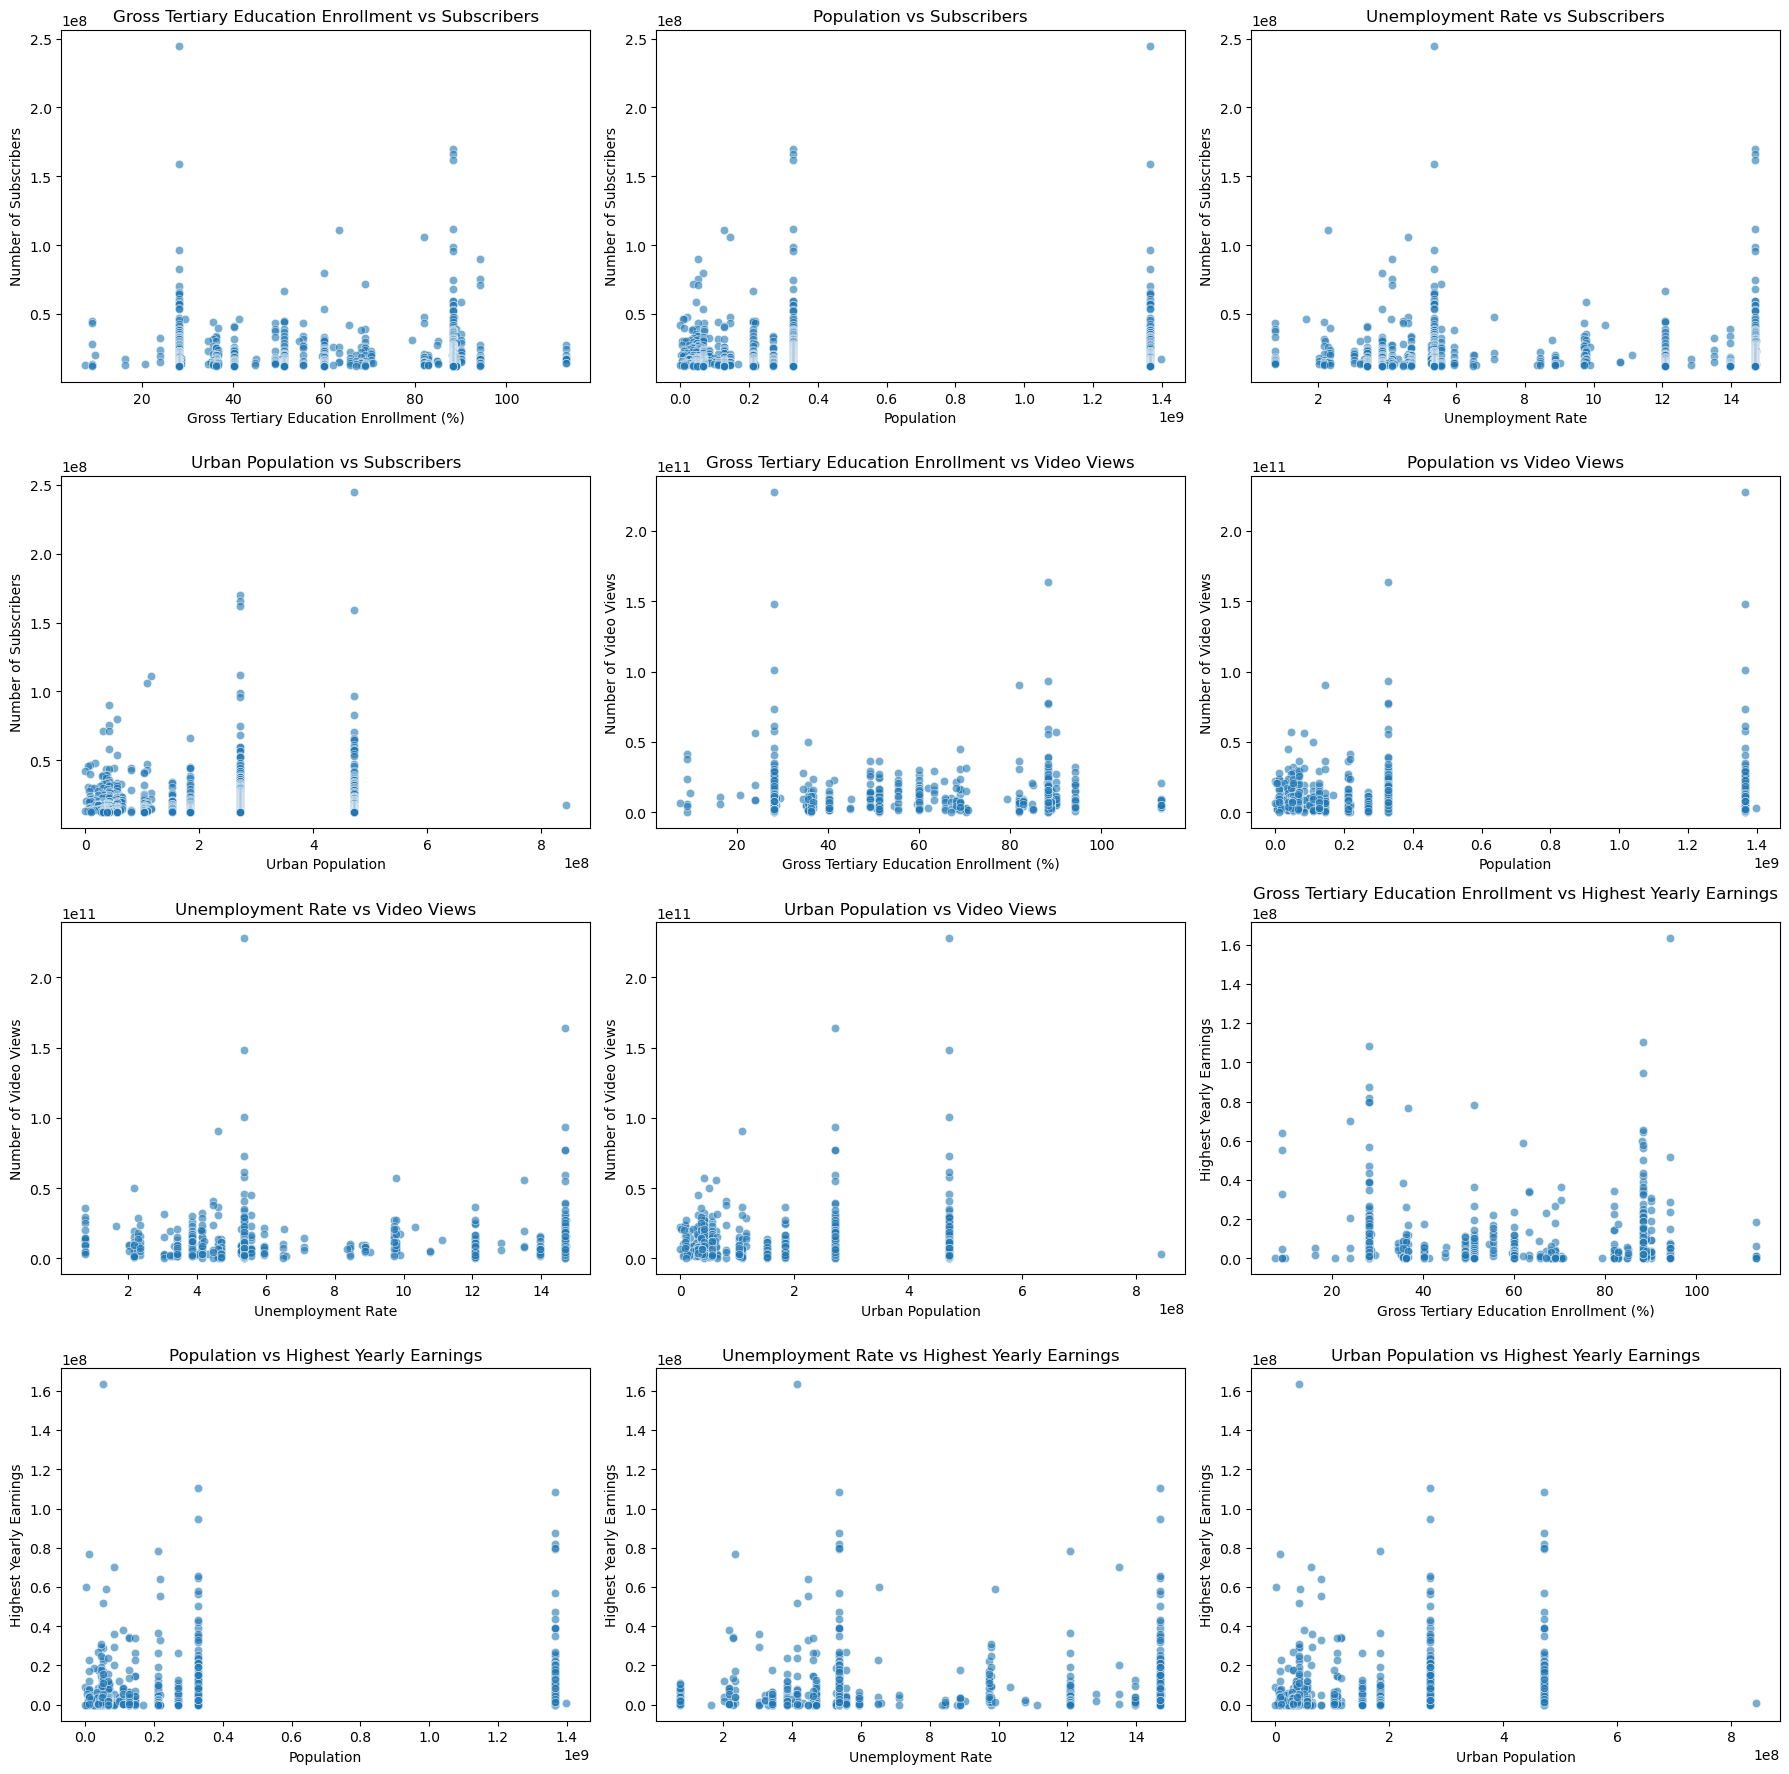

In [20]:
# Plot size
plt.figure(figsize=(18, 18))

# Create a scatter plot for Gross tertiary education enrollment vs subscribers
plt.subplot(4, 3, 1)
sns.scatterplot(data=youtube_data, x='Gross tertiary education enrollment (%)', y='subscribers', alpha=0.6)
plt.title('Gross Tertiary Education Enrollment vs Subscribers')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of Subscribers')

# Create a scatter plot for Population vs subscribers
plt.subplot(4, 3, 2)
sns.scatterplot(data=youtube_data, x='Population', y='subscribers', alpha=0.6)
plt.title('Population vs Subscribers')
plt.xlabel('Population')
plt.ylabel('Number of Subscribers')

# Create a scatter plot for Unemployment rate vs subscribers
plt.subplot(4, 3, 3)
sns.scatterplot(data=youtube_data, x='Unemployment rate', y='subscribers', alpha=0.6)
plt.title('Unemployment Rate vs Subscribers')
plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Subscribers')

# Create a scatter plot for Urban population vs subscribers
plt.subplot(4, 3, 4)
sns.scatterplot(data=youtube_data, x='Urban_population', y='subscribers', alpha=0.6)
plt.title('Urban Population vs Subscribers')
plt.xlabel('Urban Population')
plt.ylabel('Number of Subscribers')

# Create a scatter plot for Gross tertiary education enrollment vs video views
plt.subplot(4, 3, 5)
sns.scatterplot(data=youtube_data, x='Gross tertiary education enrollment (%)', y='video views', alpha=0.6)
plt.title('Gross Tertiary Education Enrollment vs Video Views')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of Video Views')

# Create a scatter plot for Population vs video views
plt.subplot(4, 3, 6)
sns.scatterplot(data=youtube_data, x='Population', y='video views', alpha=0.6)
plt.title('Population vs Video Views')
plt.xlabel('Population')
plt.ylabel('Number of Video Views')

# Create a scatter plot for Unemployment rate vs video views
plt.subplot(4, 3, 7)
sns.scatterplot(data=youtube_data, x='Unemployment rate', y='video views', alpha=0.6)
plt.title('Unemployment Rate vs Video Views')
plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Video Views')

# Create a scatter plot for Urban population vs video views
plt.subplot(4, 3, 8)
sns.scatterplot(data=youtube_data, x='Urban_population', y='video views', alpha=0.6)
plt.title('Urban Population vs Video Views')
plt.xlabel('Urban Population')
plt.ylabel('Number of Video Views')

# Create a scatter plot for Gross tertiary education enrollment vs earnings
plt.subplot(4, 3, 9)
sns.scatterplot(data=youtube_data, x='Gross tertiary education enrollment (%)', y='highest_yearly_earnings', alpha=0.6)
plt.title('Gross Tertiary Education Enrollment vs Highest Yearly Earnings')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Highest Yearly Earnings')

# Create a scatter plot for Population vs earnings
plt.subplot(4, 3, 10)
sns.scatterplot(data=youtube_data, x='Population', y='highest_yearly_earnings', alpha=0.6)
plt.title('Population vs Highest Yearly Earnings')
plt.xlabel('Population')
plt.ylabel('Highest Yearly Earnings')

# Create a scatter plot for Unemployment rate vs earnings
plt.subplot(4, 3, 11)
sns.scatterplot(data=youtube_data, x='Unemployment rate', y='highest_yearly_earnings', alpha=0.6)
plt.title('Unemployment Rate vs Highest Yearly Earnings')
plt.xlabel('Unemployment Rate')
plt.ylabel('Highest Yearly Earnings')

# Create a scatter plot for Urban population vs earnings
plt.subplot(4, 3, 12)
sns.scatterplot(data=youtube_data, x='Urban_population', y='highest_yearly_earnings', alpha=0.6)
plt.title('Urban Population vs Highest Yearly Earnings')
plt.xlabel('Urban Population')
plt.ylabel('Highest Yearly Earnings')

# Adjust the layout
plt.tight_layout()
plt.show()
